In [1]:
import os
import can
from matplotlib import pyplot as plt 

In [3]:
os.system('sudo ip link set can0 type can bitrate 500000')
os.system('sudo ifconfig can0 txqueuelen 1000')
os.system('sudo ifconfig can0 up')

0

In [4]:
can0 = can.interface.Bus(channel = 'can0', bustype = 'socketcan')# socketcan_native

In [ ]:
samples = 10**2
sampled = 0
t1 = [None]*samples
y1 = [None]*samples
#msg = can.Message(arbitration_id=0x123, data=[0, 1, 2, 3, 4, 5, 6, 7], extended_id=False)
#while sampled<samples: # Replace "While True:" with this line to generate sinusoid plot
while True:
    d1 = None
    d2 = None
    d3 = None
    d4 = None
    d5 = None
    d6 = None
    d7 = None
    #print(sampled)
    i = 0
    while i<7:
        msg = can0.recv()
        #print(msg)
        if msg != None:
            ID = msg.arbitration_id
            data = int.from_bytes(msg.data, byteorder='big')
            if ID==1:
                d1 = data
            elif ID==2:
                d2 = data
            elif ID==3:
                d3 = data
            elif ID==4:
                d4 = data
            elif ID==5:
                d5 = data
            elif ID==6:
                d6 = data
            elif ID==7:
                d7 = data
            else:
                i -=1 # Cancel post-increment if no IDs matched
            i += 1
        else:
            pass
    entry = [d1, d2, d3, d4, d5, d6, d7]
    #print(int.from_bytes(msg.data, byteorder='big'))
    #print(entry)
    #print(d7)
    if sampled <samples:
        y1[sampled]=d7
        print(d7, sampled)
        t1[sampled]=sampled
        sampled += 1



17 0
68 1
149 2
255 3
378 4
511 5
643 6
767 7
873 8
954 9
1006 10
1023 11
1006 12
955 13
874 14
768 15
645 16
512 17
380 18
256 19
150 20
69 21
17 22
0 23
17 24
68 25
149 26
255 27
378 28
511 29
643 30
767 31
873 32
954 33
1006 34
1023 35
None 36
17 37
68 38
149 39
255 40
378 41
510 42
643 43
767 44
873 45
954 46
1006 47
1023 48
1006 49
955 50
874 51
768 52
645 53
513 54
380 55
256 56
150 57
69 58
17 59
0 60
17 61
68 62
149 63
255 64
378 65
510 66
643 67
767 68
873 69
954 70
1006 71
1023 72
1006 73
955 74
874 75
769 76
645 77
513 78
380 79
257 80
150 81
69 82
17 83
0 84
17 85
67 86
149 87
254 88
378 89
510 90
643 91
766 92
873 93
954 94
1006 95
1023 96
1006 97
956 98
874 99


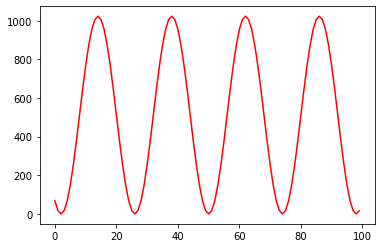

0

In [8]:
plt.plot(t1, y1, color='r', label="y1")
plt.show()
y1.count(None) # Indicates number of d7 values that were missed/skipped

In [ ]:
os.system('sudo ifconfig can0 down')

In [ ]:
#d1 = 12456
#int(d1)
#str = int(d1).to_bytes(6, 'little')

In [ ]:
#int.from_bytes(str, byteorder='little')

In [ ]:
#msg.arbitration_id